In [568]:
import pandas as pd
from pandas import read_csv 
import numpy as np
import datetime
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import collections

In [569]:
dataset=read_csv('soc-sign-bitcoinotc.csv',header=None, names=["source", "target", "rating","time"])

In [570]:
print(dataset.head(5))
print(dataset.shape)

   source  target  rating          time
0       6       2       4  1.289242e+09
1       6       5       2  1.289242e+09
2       1      15       1  1.289243e+09
3       4       3       7  1.289245e+09
4      13      16       8  1.289254e+09
(35592, 4)


In [571]:
# arrtime=[]
# for a in dataset.iloc[:,-1]:
#     arrtime.append(datetime.datetime.fromtimestamp(a))

In [572]:
# dataset.drop('time', inplace=True, axis=1)    
# dataset.insert(3, "time", arrtime, True)
# print(dataset.head(5))

In [573]:
dataset.loc[pd.DataFrame(np.sort(dataset[['source','target']],1),index=dataset.index).drop_duplicates(keep='first').index]
dataset.head(5)

,source,target,rating,time
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


In [574]:
dataset['time'] = pd.to_datetime(dataset.time * 1e9)
dataset = dataset.set_index('time')
dataset.shape

(35592, 3)

In [575]:
dataset.tail(5)

,source,target,rating
time,,,
2016-01-24 05:14:41.647290112,4499,1810,1
2016-01-24 23:50:28.049489920,2731,3901,5
2016-01-24 23:50:34.034019840,2731,4897,5
2016-01-24 23:53:52.985709824,13,1128,1
2016-01-25 01:12:03.757280000,1128,13,2


In [576]:
# ratings overview by month
dataset.resample('M').rating.value_counts().unstack().sample(5)

rating,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10
time,,,,,,,,,,,,,,,,,,,,
2015-07-31,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,10.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0
2016-01-31,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17.0,13.0,NaN,4.0,4.0,1.0,1.0,NaN,NaN,NaN
2013-08-31,678.0,NaN,1.0,NaN,NaN,6.0,2.0,1.0,1.0,8.0,886.0,163.0,63.0,31.0,33.0,11.0,4.0,5.0,1.0,40.0
2010-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,10.0,5.0,2.0,7.0,NaN,5.0,7.0,2.0,1.0
2012-11-30,30.0,1.0,NaN,NaN,NaN,10.0,3.0,3.0,1.0,77.0,589.0,144.0,65.0,13.0,23.0,1.0,3.0,6.0,3.0,19.0


In [577]:
tp1 = dataset.loc['2016']
print(f"Ratings: {len(tp1)}")
tp1.sample(10)

Ratings: 42


,source,target,rating
time,,,
2016-01-07 07:14:48.483810048,5921,5983,1
2016-01-03 01:49:53.247219968,1396,3345,-1
2016-01-02 21:33:27.016740096,5449,361,2
2016-01-11 22:50:38.736679936,1018,2124,5
2016-01-20 19:13:25.108169984,4608,2045,2
2016-01-08 18:54:26.507139840,2067,2045,7
2016-01-13 21:06:28.665509888,361,3804,4
2016-01-24 23:50:34.034019840,2731,4897,5
2016-01-07 07:16:51.756460032,5983,5921,1


In [578]:
G = nx.Graph()
for i in tp1.index:
  G.add_edge(dataset['source'][i], dataset['target'][i], weight = dataset['rating'][i])

In [579]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 39\nNumber of edges: 27\nAverage degree:   1.3846'

In [580]:
# nx.draw(G)  
# plt.draw()
nx.is_connected(G)

False

target
13      2
41      1
361     2
905     2
1052    1
1128    1
1396    1
1639    1
1731    1
1810    3
2045    3
2067    1
2124    1
2388    1
2731    1
3345    1
3714    1
3804    1
3837    1
3901    1
4296    1
4499    1
4608    2
4897    1
5318    1
5449    1
5655    1
5688    1
5903    1
5921    1
5983    2
6004    1
6005    1
Name: rating, dtype: int64
target
13       2.000000
41       2.000000
361      3.000000
905      1.000000
1052     1.000000
1128     1.000000
1396     1.000000
1639     1.000000
1731     2.000000
1810     3.666667
2045     4.666667
2067     1.000000
2124     5.000000
2388     2.000000
2731     1.000000
3345    -1.000000
3714     2.000000
3804     4.000000
3837     2.000000
3901     5.000000
4296     1.000000
4499     2.000000
4608     2.000000
4897     5.000000
5318     1.000000
5449     2.000000
5655   -10.000000
5688     1.000000
5903     1.000000
5921     1.000000
5983     2.500000
6004     1.000000
6005     1.000000
Name: rating, dtype: float64


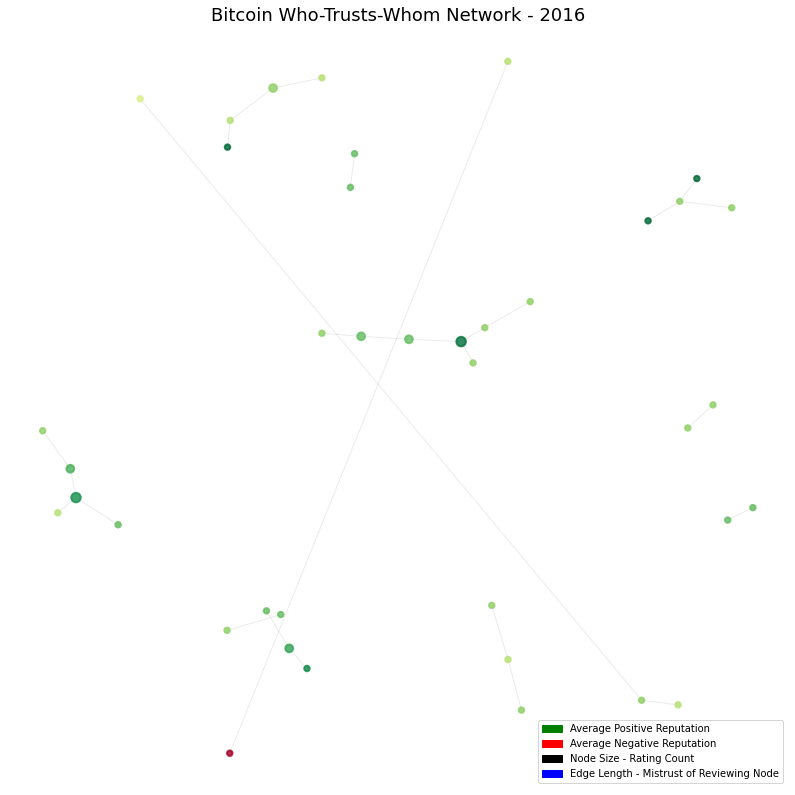

In [581]:
review_counts = tp1.groupby('target').rating.count()
average_reviews = tp1.groupby('target').rating.mean()
print(review_counts)
print(average_reviews)
def get_size(user_id, m=20, min=30):
    s = review_counts.get(user_id)
    if s is not None:
        return min * s
    else:
        return min

def get_color(user_id):
    s = average_reviews.get(user_id)
    if s is None:
        return 0.5
    # need a scaling function to translate -10-10 to 0.0-1.0 for colors maps
    return np.interp(s, (-10, 10), (0, 1))

plt.figure(figsize=(14, 14)) 
plt.title("Bitcoin Who-Trusts-Whom Network - 2016", fontsize=18)

untrusted = mpatches.Patch(color='red', label='Average Negative Reputation')
trusted = mpatches.Patch(color='green', label='Average Positive Reputation')
size = mpatches.Patch(color='black', label='Node Size - Rating Count')
edges = mpatches.Patch(color='blue', label='Edge Length - Mistrust of Reviewing Node')
plt.legend(handles=[trusted, untrusted, size, edges], loc='lower right')

pos = nx.spring_layout(G, k=0.25)
sizes = [get_size(n) for n in G]
colors = [get_color(n) for n in G]

nc = nx.draw_networkx_nodes(
    G, pos, nodelist=G.nodes(), node_size=sizes, linewidths=2.0,
    node_color=colors, cmap=plt.cm.RdYlGn, alpha=0.8
)
ec = nx.draw_networkx_edges(G, pos, arrows=True, alpha=0.08)
ax = plt.axis('off')
plt.show()

[Text(0, 0, '3'), Text(0, 0, '2'), Text(0, 0, '1')]

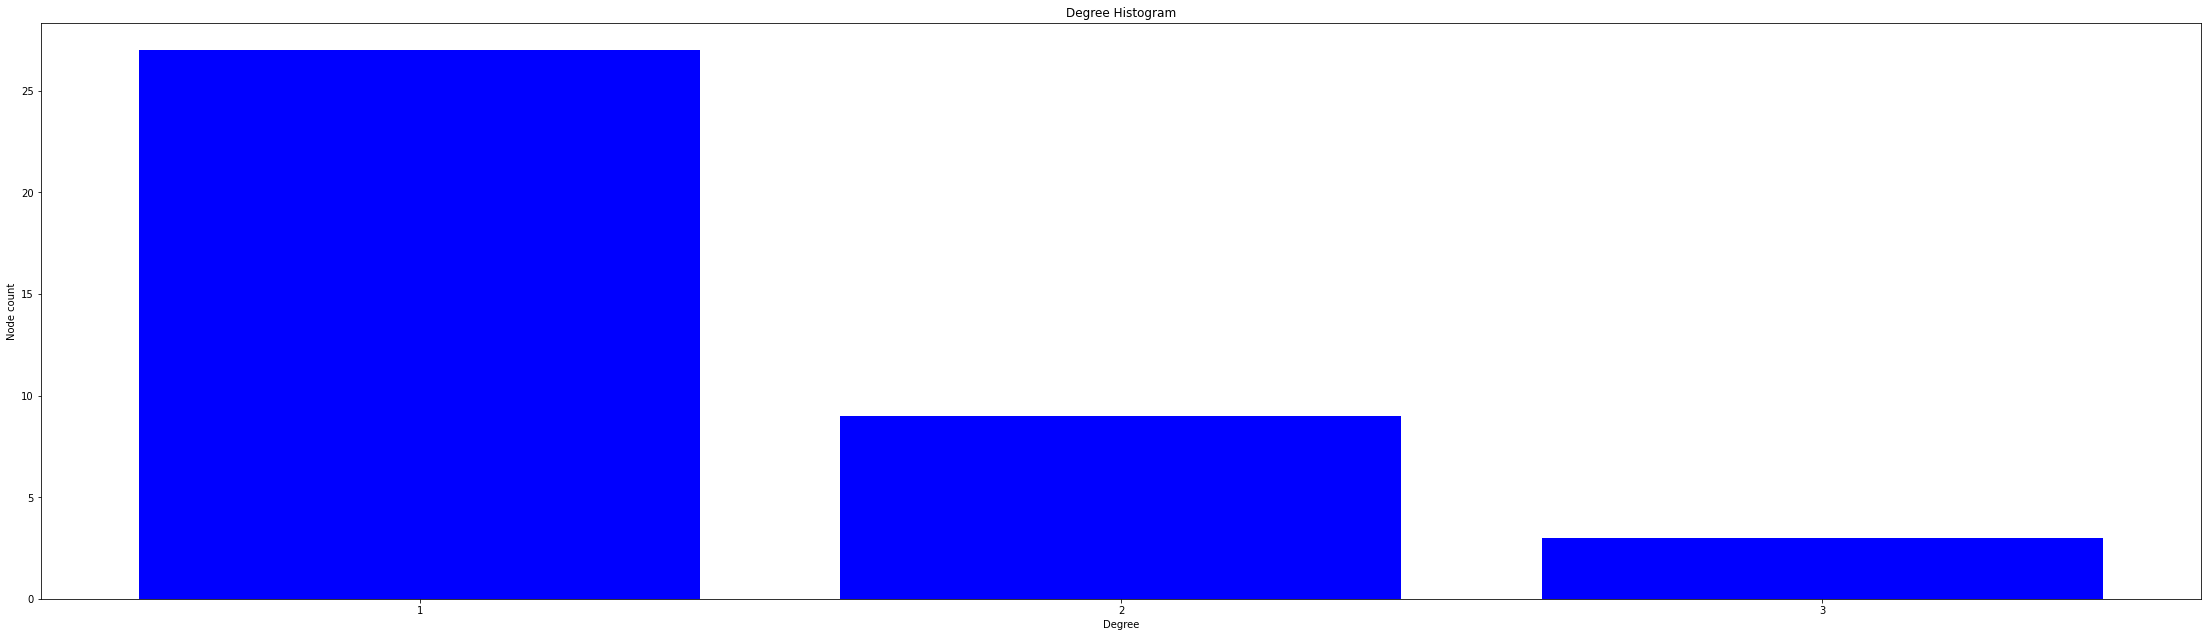

In [582]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
#plt.figure(figsize = (200, 100))
plt.subplots_adjust(left=0, right=5, bottom=0, top=2)
plt.bar(deg, cnt, width=0.8, color="b")
plt.title("Degree Histogram")
plt.ylabel("Node count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

In [583]:
l = []
for i in dataset.index:
    if(dataset['rating'][i]<0):
        l.append(dataset['source'][i])
#print(l)  

x = nx.closeness_centrality(G)
import operator
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
common=[]
closeness=[]
for i in sorted_x[-20:]:
    closeness.append(i[0])
#print(closeness)    
for k in closeness:
    for j in l:      
        if k==j:
            common.append(j)          
print("closeness - fraudulent nodes :" , np.unique(common))      

y = nx.degree_centrality(G)
import operator
sorted_y = sorted(y.items(), key=operator.itemgetter(1))
common=[]
closeness=[]
for i in sorted_y[-20:]:
    closeness.append(i[0])
for k in closeness:
    for j in l:      
        if k==j:
            common.append(j)          
print("degree - fraudulent nodes :" , np.unique(common)) 

z = nx.betweenness_centrality(G)
import operator
sorted_z = sorted(z.items(), key=operator.itemgetter(1))
common=[]
closeness=[]
for i in sorted_z[-20:]:
    closeness.append(i[0])
for k in closeness:
    for j in l:      
        if k==j:
            common.append(j)          
print("betweeness - fraudulent nodes :" , np.unique(common)) 

a = nx.pagerank(G,max_iter=10000)
import operator
sorted_a = sorted(a.items(), key=operator.itemgetter(1))
common=[]
closeness=[]
for i in sorted_a[-20:]:
    closeness.append(i[0])
for k in closeness:
    for j in l:      
        if k==j:
            common.append(j)          
print("pagerank - fraudulent nodes :" , np.unique(common)) 


closeness - fraudulent nodes : [  13   35  361  481  905 1018 1396 1639 1810 2045 2067 4499]
degree - fraudulent nodes : [  13   35  361  905 1018 1396 1810 1953 2045 2067 3804 4499]
betweeness - fraudulent nodes : [  13   35  361  905 1018 1396 1810 1953 2045 2067 3804 4499]
pagerank - fraudulent nodes : [  35  361  481 1018 1052 1731 1810 1953 2045 2067 2124 2388 3714 3837]


In [584]:
# y = nx.degree_centrality(G)
# import operator
# sorted_y = sorted(y.items(), key=operator.itemgetter(1))
# print(sorted_y[-20:])

In [ ]:
# z = nx.betweenness_centrality(G)
# import operator
# sorted_z = sorted(z.items(), key=operator.itemgetter(1))
# print(sorted_z[-20:])

In [ ]:
# a = nx.pagerank(G,max_iter=10000)
# import operator
# sorted_a = sorted(a.items(), key=operator.itemgetter(1))
# print(sorted_a[-20:])

In [ ]:
# l = []
# for i in dataset.index:
#     if(dataset['rating'][i]<0):
#         l.append(dataset['source'][i])
# print(l)        


In [ ]:
# common=[]
# for i in sorted_x[-20:]:
#     for j in l:
#         if i==j:
#             common.append(j)
# print(common)            